# HiDPy - Stage 3 : Comparison between average statistics of Subpopulations from different biological conditions

## About 

This is the third stage of the HidPy workflow. It loads the statitics from stage 2 for different conditions.

## 3.1 Import the relevant packages

_Note: Please do NOT edit this panel._ 

In [1]:
# Imports 
import seaborn as sns 
from matplotlib import pyplot as plt 
import numpy as np 
import pandas as pd
import pickle
import os
import sys 

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## 3.2 Input panel 

The user must update these parameters to match the parameters in Stage 2 and input the folder path per condition to be analyzed.

In [2]:
# Read the data and define keylists for data frame
Pickles_Cond = {}

# Folders with statistics pickles per condition
Pickles_Cond[0] = '%s/../test_conditions/DataSiR_DNA/Pickles_file_16bits/U2OS_SiR_DNA_NoSerum_crops/gmm_constrained/pickle/Statistics.pickle' % os.getcwd()
Pickles_Cond[1] = '%s/../test_conditions/DataSiR_DNA/Pickles_file_16bits/U2OS_SiR_DNA_Serum_crops/gmm_constrained/pickle/Statistics.pickle' % os.getcwd()

# Names of conditions
ConditionsSTR = ['- Serum','+ Serum']

# Parameters that were deconvolved 
Paramdecon_keylist = ['D','A','V']

## 3.3 Reading statistical results per condition 

_Note: Please do NOT edit this panel._ 

In [3]:
data_dicts = {}
file_keylists = {}

# Reading dictionaries and files keylists

for condNum in range(len(Pickles_Cond)):
    data_dict = list()

    with open(Pickles_Cond[condNum],'rb') as f:
        data_dict = pickle.load(f)

    data_dicts[condNum] = data_dict
    file_keylists[condNum] =list(data_dict.keys())

## 3.4 Plotting comparison plots per biophysical parameter

_Note: Please do NOT edit this panel._ 

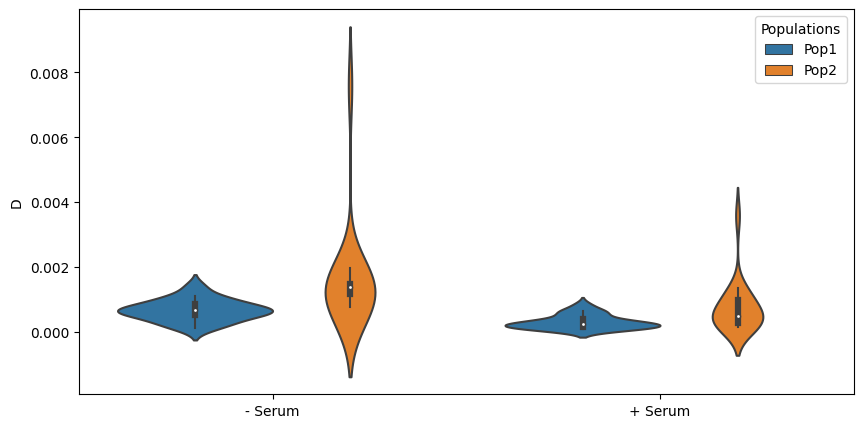

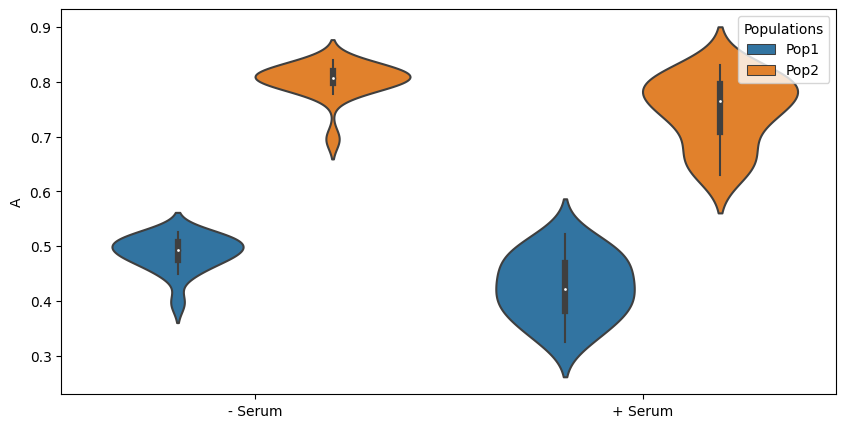

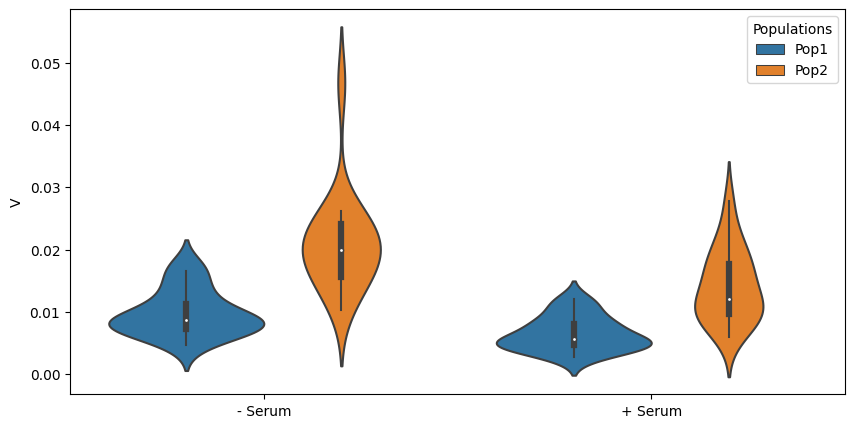

In [4]:
NumberConditions=len(file_keylists)

for i in range(len(Paramdecon_keylist)):
    df = list()
    matValues = list()

    for ii in range(NumberConditions):
        meanMat = list()
        meanMatarray = list()

        for j in range(len(file_keylists[ii])):
            mat_temp = np.array(data_dicts[ii][file_keylists[ii][j]][Paramdecon_keylist[i]])
            
            # Check if file is empty
            if mat_temp.size == 0:
                continue

            meanMat.append(mat_temp[0,:])
        meanMatarray = np.array(meanMat)

        for iii in range(meanMatarray.shape[0]):
            for jjj in range(meanMatarray.shape[1]):
                matValues.append([meanMatarray[iii, jjj], jjj, ii])
    
    
    df = pd.DataFrame(matValues, columns=['Values', 'Populations', 'Conditions'])

    # Define a mapping dictionary for replacement
    mapping = {iiii: f'Pop{iiii+1}' for iiii in range(len(df))}

    # Replace values in the 'Populations' column using the mapping dictionary
    df['Populations'] = df['Populations'].replace(mapping)

    # Plot the data using seaborn violinplot
    fig, axes = plt.subplots(figsize=(10,5))
    sns.violinplot(x='Conditions', y='Values', hue='Populations', data=df,ax = axes, orient ='v')
    
    # Set axis labels
    plt.xlabel('')
    plt.xticks([0,1],ConditionsSTR)
    plt.ylabel(Paramdecon_keylist[i])

    # Show the plot
    plt.show()